In [1]:
# example_jax.ipynb
# Authors: Stephan Meighen-Berger
# Shows how to use the jax options and some advantages
# Note only functions are returned when using jax!

In [25]:
# Import generic stuff
import numpy as np
import matplotlib.pyplot as plt
import sys
from tqdm import tqdm
from jax import grad

ImportError: cannot import name 'gamma' from 'jax.scipy.special' (/home/meighniac/miniconda3/envs/jfennel/lib/python3.9/site-packages/jax/scipy/special.py)

In [3]:
# Font style
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=False)

In [4]:
# Import package
# Adding path to module
sys.path.append("../")
# Module imports
# TODO: Fix this
from fennel import Fennel, config
# picture path
PICS = '../pics/'

In [5]:
# Plotting standards
std_size = 6.  # Size of the plot
fontsize = 20.  # Fontsize in the plot
lw=1.  # Linewidth
h_length=1  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [6]:
# Creating a fennel object
fennel_instance = Fennel()

In [7]:
# Energies of interest
energy_ids = [0, 10, 20, 30, 40]
egrid = config['advanced']["energy grid"]
track_lengths = config['advanced']['track lengths']
track_ids = [30]
wavelengths = config['advanced']['wavelengths']
angle_grid = config['advanced']['angles']
zgrid = config['advanced']['z grid']

In [8]:
test_energy = 1e5

In [9]:
# Track example
# The only option are functions
track_counts_diff_func, track_angles_func = fennel_instance.track_yields(energy=test_energy, deltaL=1., interaction='total')

In [10]:
# Evalulating the fetched functions
track_counts_diff_loc = np.array([
    track_counts_diff_func(test_energy, wavelength, 'total')
    for wavelength in wavelengths
])
track_angles_loc = np.array([
    track_angles_func(angle, 1.33, test_energy)
    for angle in angle_grid
])

In [11]:
# How to calculate the total counts
print(np.trapz(track_counts_diff_loc.flatten(), wavelengths))

407.7728726647117


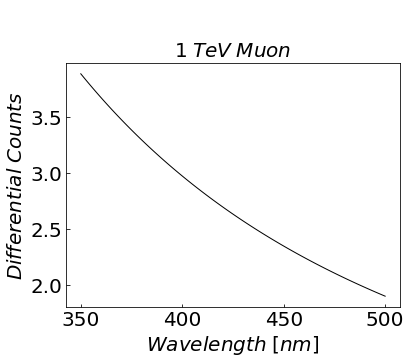

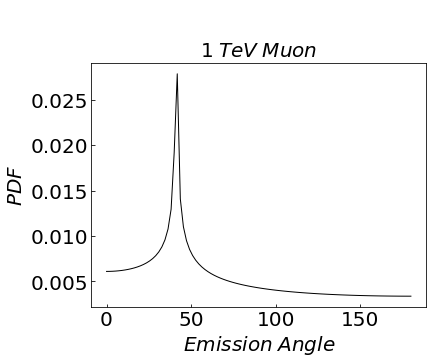

In [24]:
# Plotting some track stuff
# Photon counts
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(wavelengths, track_counts_diff_loc, linewidth=lw, color='k', ls='-')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Wavelength\;[nm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Differential\;Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;Muon$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Track_Wavelength_JAX.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Angles
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(angle_grid, track_angles_loc / np.trapz(track_angles_loc, x=angle_grid),
         linewidth=lw, color='k', ls='-')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Emission\;Angle$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;Muon$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Track_Angle_JAX.png",
               bbox_inches='tight', dpi=export_dpi)

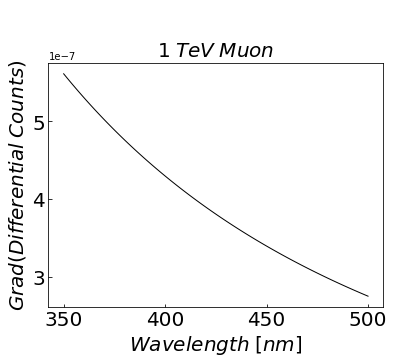

In [23]:
# Differential function
grad_track_counts_diff = grad(track_counts_diff_func)
# Plot
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(wavelengths,
         np.array([
             grad_track_counts_diff(test_energy, wavelength, 'total')
             for wavelength in wavelengths
         ]),
         linewidth=lw, color='k')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Wavelength\;[nm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Grad(Differential\;Counts)$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;Muon$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Grad_Counts_JAX.png",
               bbox_inches='tight', dpi=export_dpi)

In [14]:
# Electromagnetic Cascade
em_counts_diff_func, em_long_func, em_angles_func = fennel_instance.em_yields(energy=test_energy, particle=11, mean=True, function=True)

In [15]:
# Evaluating the fetched functions
em_counts_diff_val = em_counts_diff_func(test_energy, wavelengths, 11, mean=True)
em_long_val = em_long_func(test_energy, zgrid, fennel_instance._particles[11])
em_angles_val = em_angles_func(angle_grid, 1.33, fennel_instance._particles[11])

In [16]:
# How to calculate the total counts
print(np.trapz(em_counts_diff.flatten(), wavelengths))

15224141056.043013


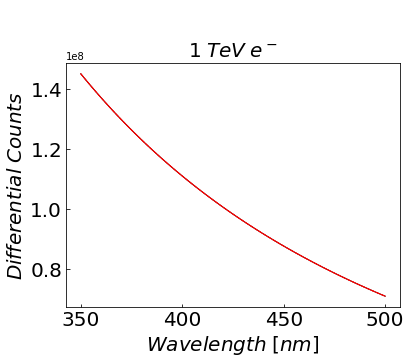

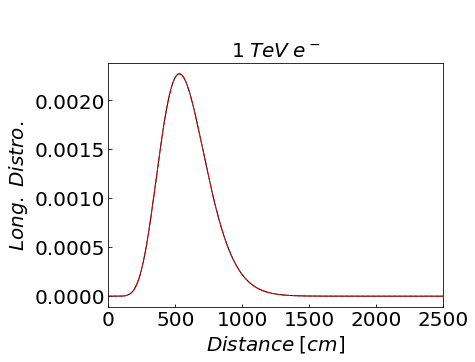

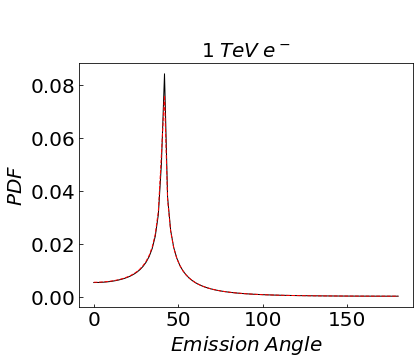

In [17]:
# Plotting some EM stuff
# Photon counts
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(wavelengths, em_counts_diff, linewidth=lw, color='k')
ax1.plot(wavelengths, em_counts_diff_val, linewidth=lw, color='r', ls='--')
ax1.plot(wavelengths, em_counts_single, linewidth=lw, color='r')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Wavelength\;[nm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Differential\;Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;e^-$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_EM_Wavelength.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Long
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(zgrid, em_long[0] / np.trapz(em_long[0], x=zgrid),
         linewidth=lw, color='k')
ax1.plot(zgrid, em_long_val[0] / np.trapz(em_long_val[0], x=zgrid),
         linewidth=lw, color='r', ls='--')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Distance\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Long.\;Distro.$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;e^-$", fontsize=fontsize)
ax1.set_xlim(0, 2500)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_EM_Long.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Angles
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(angle_grid, em_angles / np.trapz(em_angles, x=angle_grid),
         linewidth=lw, color='k')
ax1.plot(angle_grid, em_angles_val / np.trapz(em_angles_val, x=angle_grid),
         linewidth=lw, color='r', ls='--')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Emission\;Angle$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;e^-$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_EM_Angle.png",
               bbox_inches='tight', dpi=export_dpi)

In [18]:
# Hadron Cascade
had_counts_diff, had_long, had_em, had_angles = fennel_instance.hadron_yields(energy=test_energy, particle=211, mean=True, function=False)
had_counts_diff_func, had_long_func, had_em_func, had_angles_func = fennel_instance.hadron_yields(energy=test_energy, particle=211, mean=True, function=True)
had_counts_single, _, had_em_single, _ = fennel_instance.hadron_yields(energy=test_energy, particle=211, mean=False, function=False)
samples = 1000
em_frac_samples = []
for i in tqdm(range(samples)):
    _, _, had_em_single, _ = fennel_instance.hadron_yields(energy=test_energy, particle=211, mean=False, function=False)
    em_frac_samples.append(had_em_single)

100%|██████████| 1000/1000 [00:01<00:00, 776.30it/s]


In [19]:
# Evaluating the fetched functions
had_counts_diff_val = had_counts_diff_func(test_energy, wavelengths, 211, mean=True)
had_long_val = had_long_func(test_energy, zgrid, fennel_instance._particles[211])
had_em_val = had_em_func(test_energy, 211, mean=True)
had_angles_val = had_angles_func(test_energy, angle_grid, 1.33, fennel_instance._particles[211])

In [20]:
# How to calculate the total counts
print(np.trapz(had_counts_diff.flatten(), wavelengths))

14548794409.108799


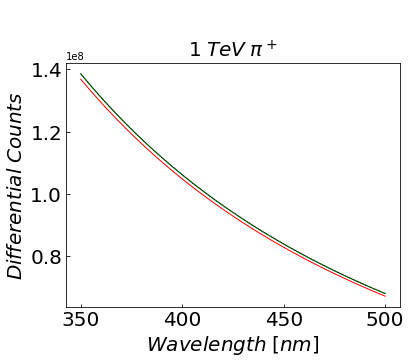

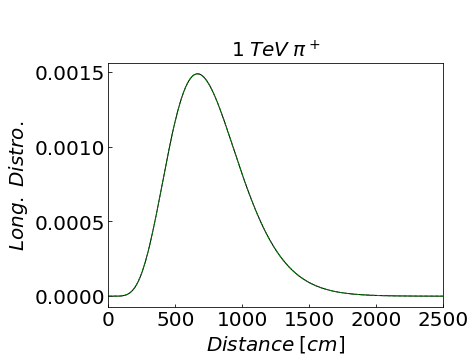

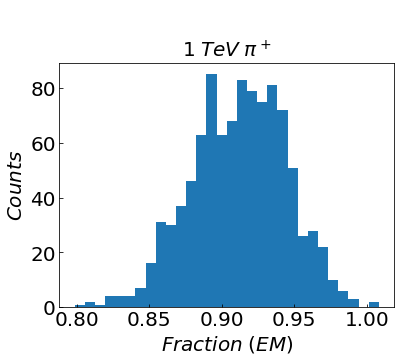

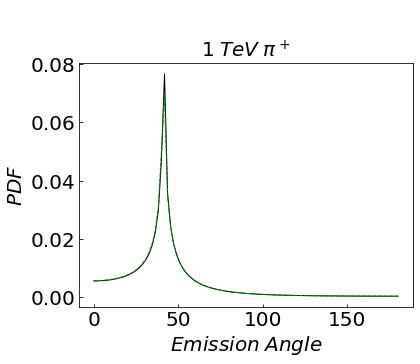

In [21]:
# Plotting some hadron stuff
# Photon counts
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(wavelengths, had_counts_diff, linewidth=lw, color='k')
ax1.plot(wavelengths, had_counts_diff_val, linewidth=lw, color='g', ls='--')
ax1.plot(wavelengths, had_counts_single, linewidth=lw, color='r')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Wavelength\;[nm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Differential\;Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(
    PICS + "Single_Had_Wavelength.png",
    bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Long
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(zgrid, had_long[0] / np.trapz(had_long[0], x=zgrid),
         linewidth=lw, color='k')
ax1.plot(zgrid, had_long_val[0] / np.trapz(had_long_val[0], x=zgrid),
         linewidth=lw, color='g', ls='--')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Distance\;[cm]$', fontsize=fontsize)
ax1.set_ylabel(r'$Long.\;Distro.$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
ax1.set_xlim(0, 2500)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Had_Long.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Fraction
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
count, bins, ignored = ax1.hist(np.array(em_frac_samples).flatten(), 30, density=False)
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Fraction\;(EM)$', fontsize=fontsize)
ax1.set_ylabel(r'$Counts$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
# ax1.set_xlim(0, 2500)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Single_Had_Frac.png",
               bbox_inches='tight', dpi=export_dpi)
# ----------------------------------------------
# ----------------------------------------------
# Angles
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
ax1.plot(angle_grid, had_angles / np.trapz(had_angles, x=angle_grid, axis=0),
         linewidth=lw, color='k')
ax1.plot(angle_grid, had_angles_val / np.trapz(had_angles_val, x=angle_grid, axis=0),
         linewidth=lw, color='g', ls='--')
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('linear')
ax1.set_xlabel(r'$Emission\;Angle$', fontsize=fontsize)
ax1.set_ylabel(r'$PDF$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_title("$1\;TeV\;\pi^+$", fontsize=fontsize)
# ax1.set_xlim(500, 600)
# ax1.set_ylim(1e-3, 1e2)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(
    PICS + "Single_Had_Angle.png",
    bbox_inches='tight', dpi=export_dpi)

/home/meighniac/fennel/notebooks/../fennel/hadron_cascades.py:332: RuntimeWarning: divide by zero encountered in power
  energy_2d[id_arr]**(-gamma[id_arr])


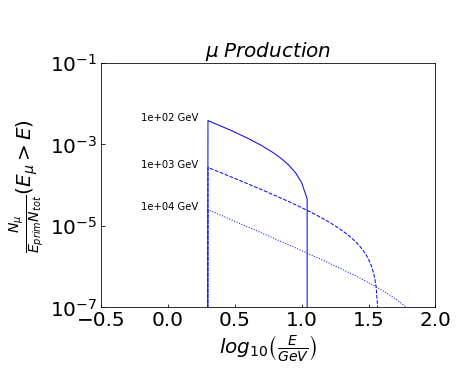

In [22]:
# Plotting some hadron stuff (beta)
# Muon Counts
primary_grid = np.array([1e2, 1e3, 1e4])
seconday_grid = np.arange(1., 10**3.5, step=1.)
particles_to_check = [
    fennel_instance._particles[211],
    # fennel_instance._particles[130],
    # fennel_instance._particles[2212]
]
line_colors = ["b", "g", "k"]
line_styles = ["-", "--", ":"]
# Fetching desired results
distro_lib = {}
for particle in particles_to_check:
    distro_lib[particle._name] = (
        fennel_instance._hadron_cascade._muon_production_fetcher(
            primary_grid, seconday_grid, particle
        )
    )
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# Plotting
for id_prim, primary in enumerate(primary_grid):
    for id_part, particle in enumerate(particles_to_check):
        ax1.plot(
            np.log10(seconday_grid),
            distro_lib[particle._name][id_prim] / primary /
            np.trapz(distro_lib[particle._name][id_prim],
            x=seconday_grid),
            linewidth=lw,
            color=line_colors[id_part], ls=line_styles[id_prim]
        )
# ---------------------------------------------
# Plotting options
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$log_{10}\left(\frac{E}{GeV}\right)$', fontsize=fontsize)
ax1.set_ylabel(r'$\frac{N_\mu}{E_{prim}N_{tot}}\left(E_\mu > E\right)$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +1.27),
                  ncol=3, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
ax1.set_xlim(-0.5, 2.)
ax1.set_ylim(1e-7, 1e-1)
for id_prim, prim in enumerate(primary_grid):
    max_val = max(
        distro_lib[particles_to_check[0]._name][id_prim] / prim /
        np.trapz(distro_lib[particles_to_check[0]._name][id_prim], x=seconday_grid))
    ax1.text(-0.2, max_val, "%.e GeV" % prim, fontsize=fontsize/2)
ax1.set_title("$\mu\;Production$", fontsize=fontsize)
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "Muon_counts.png",
               bbox_inches='tight', dpi=export_dpi)